In [13]:
import pandas as pd, sqlite3

conn = sqlite3.connect("../data/checking-logs.sqlite")

In [14]:
## Загрузка и группировка просмотров (pageviews)
query_views = """
SELECT datetime
FROM pageviews
WHERE uid LIKE 'user_%';
"""
views = pd.read_sql(query_views, conn, parse_dates=["datetime"])
views["date"] = views["datetime"].dt.date
views_daily = views.groupby("date").size().reset_index(name="views")

In [15]:
## Загрузка и группировка первых коммитов (checker)
query_commits = """
SELECT timestamp
FROM checker
WHERE uid LIKE 'user_%';
"""
commits = pd.read_sql(query_commits, conn, parse_dates=["timestamp"])
commits["date"] = commits["timestamp"].dt.date
commits_daily = commits.groupby("date").size().reset_index(name="commits")


In [9]:
## Объединение только по датам, которые есть в обоих наборах
merged = pd.merge(views_daily, commits_daily, on="date", how="inner")

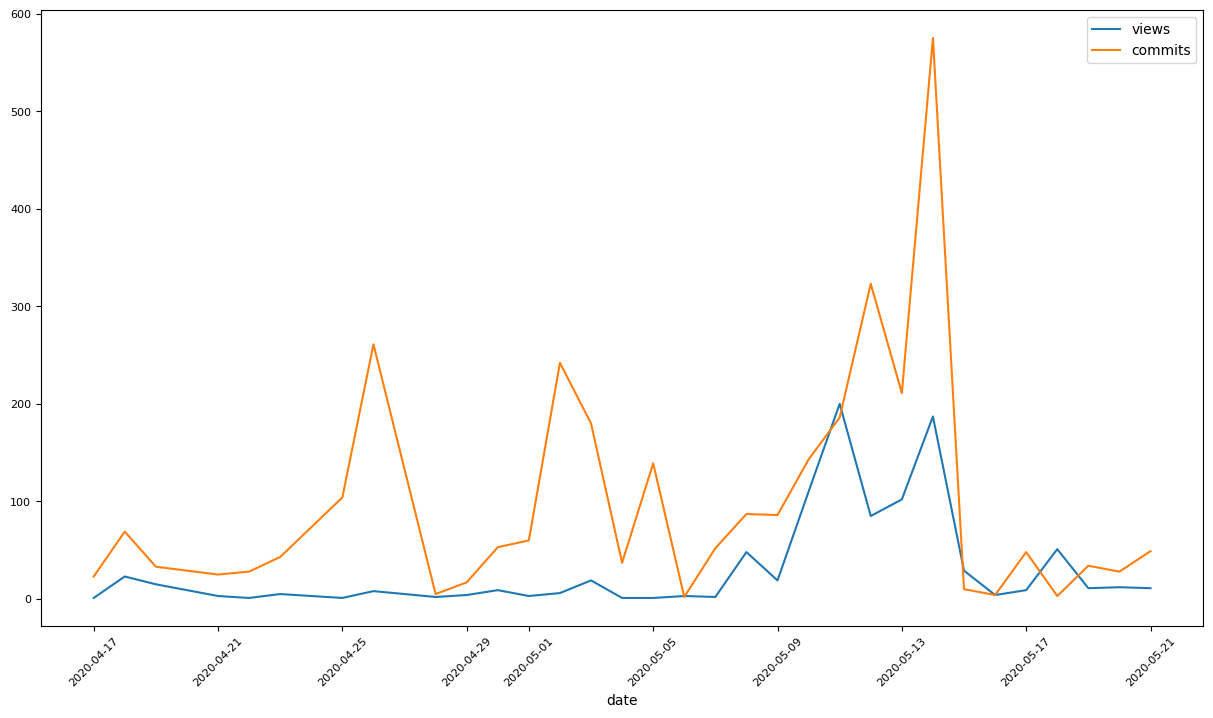

In [17]:
## График
ax = merged.plot(
    x="date",
    y=["views", "commits"],
    figsize=(15, 8),
    fontsize=8,
)
ax.tick_params(axis='x', labelrotation=45)

In [13]:
## Сколько раз просмотров превышало 150
count_above_150 = (merged["views"] > 150).sum()
print("Views > 150 occurred:", count_above_150, "times")


Views > 150 occurred: 2 times


In [15]:
conn.close()


## Вопрос
Сколько раз количество просмотров превышало 150?

Ответ — **2**.